# Multiplex Cluster Swap

Random partition model. We swap members of the partitions and examine the timescale and final fraction size

Partition size = n. We use threshold in vicinity of 1/n

Question 1: What is the spreading process like on a random partition model?

notation: file XvY: X = pop size /community, Y = #community

edge_swap_5v20_mu03.npy
swap edges, 20 communities 750 edges swapped, 900 runs, 50 dots

**FAULTY**
node_swap_5v20_mu03.npy
swap nodes 20 communities max pair of nodes swapped 100 900 runs 100 dots

**CORRECTED**
filename = 'cluster_cluster_p/node_swap_5v20_mu03_new.npy'
swap nodes 20 communities max pair of nodes swapped 100 30*3*20 runs 50 dots



edges_swap_20v5_mu03.npy
swap edges, 5 communities 80 samples, 10000 max edges swapped


In [2]:
%matplotlib inline

import networkx as nx
import numpy as np
import copy
import matplotlib
import matplotlib.pyplot as plt

from multiprocessing import Pool

In [3]:
def simulate(G, H, trialtime, thresh, infected):    
    results = np.zeros([trialtime])
    #redun_connections= np.ones([trialtime])
    #timetaken = np.zeros([trialtime])
    
    for t in range(trialtime):
        aware = set([])
        results[t] = len(infected)
        for node in infected:
            aware.update({n for n in H.neighbors(node)})
        temp = copy.deepcopy(aware)
        temp_infect = copy.deepcopy(infected)

        for node in temp:
            neighset = {n for n in G.neighbors(node)}

            if len(temp_infect.intersection(neighset)) >= thresh[node]*len(neighset) :
                infected.update({node})
            else: 
                infected = infected-{node}
    return results
    

In [4]:
def comm_network(G, n_swap):
    H = G.copy()
    H = nx.double_edge_swap(H, n_swap, max_tries=n_swap*len(G));
    return H

In [1]:
def nodeswap(G, n_swap):
    H = G.copy()
    noodes = np.random.choice(np.arange(len(G)), n_swap, replace=False)
    for n in range(int(n_swap/2)):
        nodeA = noodes[2*n]
        nodeB = noodes[2*n+1]
        neighsetA = list(set(G.neighbors(nodeA))-{nodeB})
        neighsetB = list(set(G.neighbors(nodeB))-{nodeA})
        H.remove_edges_from(G.edges(nodeA))
        H.remove_edges_from(G.edges(nodeB))
        H.add_edges_from(zip([nodeA]*len(neighsetB), neighsetB))
        H.add_edges_from(zip([nodeB]*len(neighsetA), neighsetA))
        if nodeB in set(G.neighbors(nodeA)):
            H.add_edge(nodeA, nodeB)
    return H

In [57]:
def go(mu, max_nswap):
    trialtime = 15

    sigma = 0.2
    thresh = np.random.normal(mu, sigma, len(G))

    finesse = int(max_nswap/3)
    results_finegrain = np.zeros([finesse,trialtime])
    trialnumber = 100
    
    for T in range(trialnumber):
        infected = set((np.where(thresh <= 0)[0]))

        for i in range(finesse):

            n_swap = int(float((i)/(finesse))*max_nswap)

            H = comm_network(G, n_swap)
            R = simulate(G, H, trialtime, thresh, copy.deepcopy(infected))
            results_finegrain[i] = R + results_finegrain[i]
           
    return results_finegrain/trialnumber/len(G)


In [7]:
def Go(mu):
    return go(mu, int(S*1.5))

In [ ]:
plt.semilogy(np.exp(b)*np.exp(m*np.arange(300)), 'k-')
plt.semilogy(int_curve,'b--')

In [ ]:
np.save('power_1p9_N_100_trials_1000.npy', infectionsize)

In [ ]:
list(range(1,2))

In [69]:
N_group = 20
N_verti = 5
p_out = float(1.0/95)
finesse = 30
trialtime = 30

trialnumber = 100
results_control = np.zeros([finesse, trialtime])
for T  in range(trialnumber):

    for n in range(finesse):
        mu = float(n/finesse*0.7)
        G =nx.planted_partition_graph(N_group, N_verti, 1, p_out)

        sigma = 0.2
        thresh = np.random.normal(mu, sigma, len(G))
        infected = set((np.where(thresh <= 0)[0]))
        results_control[n] = results_control[n]  + simulate(G, G, trialtime, thresh, copy.deepcopy(infected))

results_control = results_control/trialnumber

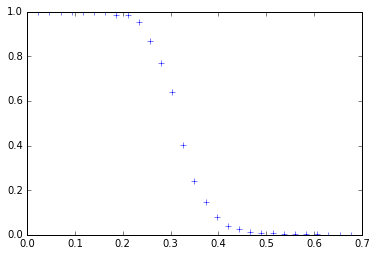

In [72]:
plt.plot(np.arange(finesse)*0.7/finesse,(results_control.T)[29]/100, 'b+')
np.save('cluster_cluster_p/control_20v5_p0.01_mu_scan', results_control)

In [18]:
np.sum(np.random.normal(0.2, 0.2, 100)<=0)

16

IndexError: index 50 is out of bounds for axis 0 with size 50

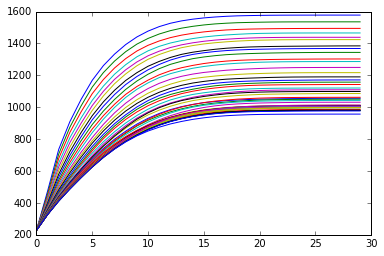

In [37]:
infectionsize = (results.T)[29]
for r in np.arange(100):
    plt.plot(results[r])

#plt.ylim(0,400)

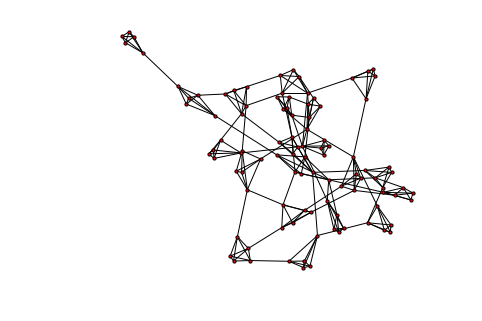

In [30]:
G =nx.planted_partition_graph(20, 5, 1, float(1.0/95.0))
H_temp = comm_network(G, 750)
position = nx.spring_layout(G)
nx.draw(G, pos = position, node_size = 10)

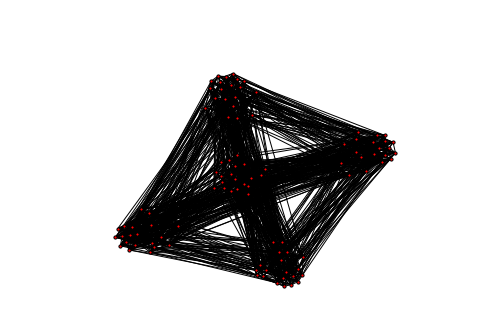

In [55]:
nx.draw(H_temp, pos = position, node_size = 10)

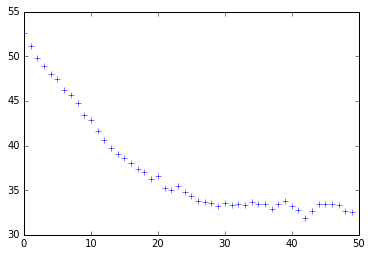

In [39]:
#plt.plot(np.arange(10)*0.05/50,(infectionsize.T)[49][np.arange(10)], 'b-')
plt.plot((infectionsize)/30, 'b+')

In [14]:
N = 100
N_group = 20
N_verti = 5
sigma=0.2
trialtime = 30
#mu = float(6/N_verti)
mu=0.3
finesse = 50
#max_nswap = 10000 
max_nswap=200
np.random.seed(0)
def go(trialnumber):
    
    results = np.zeros([finesse, trialtime])
    for T  in range(trialnumber):
        
        G =nx.planted_partition_graph(N_group, N_verti, 1, float(1.0/95.0))
        H = G.copy()
        thresh = np.random.normal(mu, sigma, N_group*N_verti)
        infected = set((np.where(thresh <= 0)[0]))
        for n in range(finesse):
            #G = nx.planted_partition_graph(N_group, N_verti, 1, n/finesse)
            #H = nx.double_edge_swap(H, int(max_nswap/finesse), max_tries=max_nswap*N_group*N_verti);
            #H = comm_network(H, n*max_nswap/finesse )
            H = nodeswap(H, 4)
            results[n] = results[n]  + simulate(G, H, trialtime, thresh, copy.deepcopy(infected))

    return results/trialnumber

filename = 'cluster_cluster_p/node_swap_5v20_mu03_new.npy'
np.save(filename, np.zeros([finesse, trialtime]))
membuff=30
for savetomem in range(membuff):
    pool= Pool()
    results_new = pool.map(go, [20, 20, 20])
    results = np.load(filename) + np.asarray(sum(results_new), dtype=float)/3
    np.save(filename, results)

np.save(filename, np.load(filename)/membuff)


In [11]:
len(results)

50

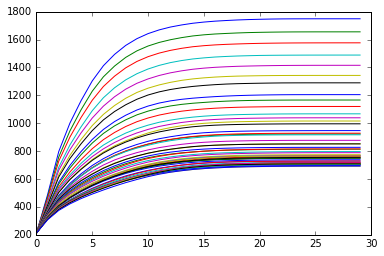

In [15]:
for r in range(len(results)):
    plt.plot(results[r])

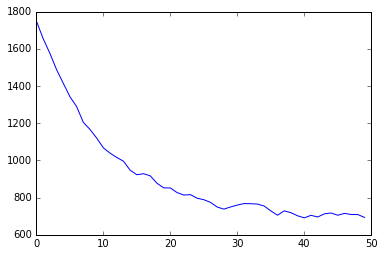

In [16]:
plt.plot(results.T[29])

In [ ]:
N = 100
D = N-1 #maximum degree
lamb = 2.7


S = 1
while S % 2 != 0:
    degree_seq = np.random.choice(np.arange(D), N, replace=True, p=powerlaw(D,lamb, 0.0))
    S = np.sum(degree_seq)

Gfull=nx.configuration_model(list(degree_seq))
G=nx.Graph(Gfull)
G.remove_edges_from(G.selfloop_edges())

S = np.sum(degree_seq)
def Go(trialnumber):
    return go(trialnumber, int(S*1.5))

pool= Pool()
results = pool.map(Go, [250, 250, 250, 250])
infectionsize = np.asarray(sum(results), dtype=float)/4
np.save('power_2p7_N_100_trials_1000.npy', infectionsize)

In [ ]:
N = 100
D = N-1 #maximum degree
lamb = 2.3


S = 1
while S % 2 != 0:
    degree_seq = np.random.choice(np.arange(D), N, replace=True, p=powerlaw(D,lamb, 0.0))
    S = np.sum(degree_seq)

Gfull=nx.configuration_model(list(degree_seq))
G=nx.Graph(Gfull)
G.remove_edges_from(G.selfloop_edges())

S = np.sum(degree_seq)
def Go(trialnumber):
    return go(trialnumber, int(S*1.5))

pool= Pool()
results = pool.map(Go, [250, 250, 250, 250])
infectionsize = np.asarray(sum(results), dtype=float)/4
#np.save('power_2p3_N_100_trials_1000.npy', infectionsize)

In [ ]:
N = 100
D = N-1 #maximum degree
lamb = 2.1


S = 1
while S % 2 != 0:
    degree_seq = np.random.choice(np.arange(D), N, replace=True, p=powerlaw(D,lamb, 0.0))
    S = np.sum(degree_seq)

Gfull=nx.configuration_model(list(degree_seq))
G=nx.Graph(Gfull)
G.remove_edges_from(G.selfloop_edges())

S = np.sum(degree_seq)
def Go(trialnumber):
    return go(trialnumber, int(S*1.5))

pool= Pool()
results = pool.map(Go, [250, 250, 250, 250])
infectionsize = np.asarray(sum(results), dtype=float)/4
#np.save('power_2p1_N_100_trials_1000.npy', infectionsize)

In [135]:
np.sum(np.random.normal(0.4, 0.2, 100)<=0)

0

In [197]:
G = nx.planted_partition_graph(5,5, 1, 0.02)
len(G.edges())

59

In [217]:
posit = nx.spring_layout(G)
nx.draw(H,  node_size=10)

NameError: name 'H' is not defined

59

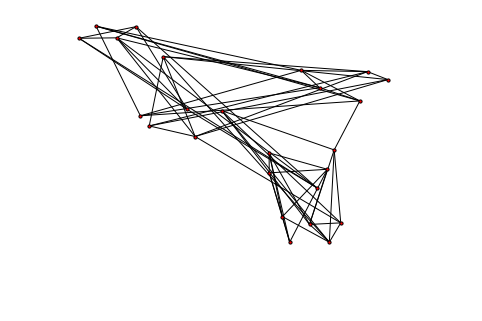

In [212]:
G = nodeswap(G,2)
nx.draw(G, pos=posit, node_size=10)
len(G.edges())

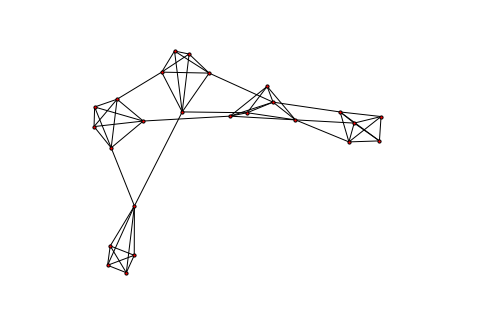

In [213]:
nx.draw(G, pos=nx.spring_layout(G), node_size=10)